Q1

Here’s a summary of what we’ve discussed in this session:

Classification Decision Tree Overview:

Defined as a supervised learning model used to classify data into categories based on decision rules.
It predicts categorical outputs but can also handle regression tasks (Regression Trees).
Problems Addressed and Applications:

Decision Trees are ideal for classification (e.g., spam detection, medical diagnosis) and regression (e.g., price prediction).
Real-world examples include fraud detection, loan approvals, and customer segmentation.
Comparison with Linear Regression:

Linear Regression predicts numerical outcomes by modeling linear relationships between features and a target variable.
Classification Decision Trees predict categorical outcomes by splitting data into groups based on feature values.
Similarities Between Decision Trees and Linear Regression:

Both are supervised learning algorithms that predict a target variable based on input features.
Both assess feature importance and can be interpreted easily compared to complex models.
Decision Trees can also be adapted for regression (Regression Trees).
Key Differences:

Linear Regression identifies the relationship between variables and predicts numerical outcomes.
Decision Trees focus on creating decision-making rules and can handle both categorical (classification) and numerical (regression) targets.
Decision Trees: Purpose and Use:

The primary purpose is to classify data or predict outcomes using rule-based decisions.
Unlike Linear Regression, they don’t explicitly show the strength or direction of relationships but rather define how to make decisions step-by-step.
Comparative Example:

For tasks like loan approval:
Linear Regression quantifies how features like income and credit score influence approval.
Decision Tree creates rules like "If income > $50,000 and credit score > 700, approve."

https://chatgpt.com/share/673ebad1-dfa8-8006-b149-95179d9f20d1

Q2

1.
Accuracy: when the number of the positive and negative are almost same and in the same time false positives and false negatives have similar impacts.
for example:A spam filter that labels emails as "spam" or "not spam" and works with equal concern for both types of errors.
2.
Sensitivity:when the impact for false negative is really high, higher than false positive.
for example:COVID-19 Testing: Ensuring that all infected individuals are identified is critical to prevent the spread of the virus.
3.
Specificity:when the negative states are really common and the impact for false positive is really high.
for example:Statistical testing in experiments where researchers aim to minimize Type I errors (false positives)
4.
Precision:when the impact of false positive is really high.
for example:Cancer Screening: A test for a specific type of cancer, where a false positive leads to an unnecessary biopsy or treatment that could have side effects or costs. Ensuring that positive results are truly positive minimizes the chance of harmful procedures being done on healthy patients.

Q3

In [30]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print(ab_reduced_noNaN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


In [31]:
ab_reduced_noNaN.describe()


,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


In [32]:
ab_reduced_noNaN.value_counts()

Title                                                                             Author                             List Price  Amazon Price  Hard_or_Paper  NumPages  Publisher                      Pub year  ISBN-10     Thick
1,001 Facts that Will Scare the S#*t Out of You: The Ultimate Bathroom Reader     Cary McNeal                        12.95       5.18          P              304       Adams Media                    2010      1605506249  0.8      1
The Bookseller of Kabul                                                           Seierstad                          13.99       10.68         P              288       Back Bay Books                 2004      316159417   0.9      1
The Crying of Lot 49                                                              Thomas Pynchon                     12.99       9.66          P              192       Harper Perennial               2006      006091307X  0.4      1
The Crucible                                                                 

Q4

[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]'),
 Text(0.75, 0.5, 'x[0] <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]')]

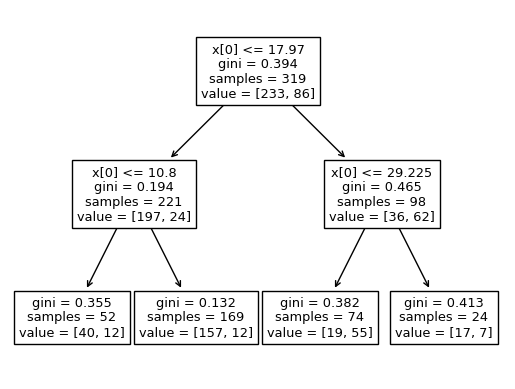

In [33]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

train, test = model_selection.train_test_split(ab_reduced_noNaN, train_size=0.8)

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

tree.plot_tree(clf)

Here’s a summary of our chat history so far:

1. **Data Analysis Projects**:
   - You’re analyzing various datasets, particularly focusing on social behavior and preferences related to gender, relationship status, and social activity participation. This involves working with the **CSCS dataset** and using various statistical methods, like bootstrapping and hypothesis testing, to explore these patterns.
   - You also analyzed data from a dataset related to **Amazon books**, which involved pre-processing (e.g., handling missing values, adjusting data types) and visualizing the information.

2. **Statistical and Machine Learning Techniques**:
   - You’re learning about **exploratory data analysis (EDA)** to understand datasets better, including using summary statistics and visualizations (e.g., histograms, boxplots) to identify patterns or data issues.
   - We discussed **data splitting** techniques, including using **train_test_split** for creating training and test sets in machine learning tasks.
   - You’ve started working with **scikit-learn** for **machine learning tasks**, particularly fitting a **DecisionTreeClassifier** to predict outcomes, like determining if a book is hardcover or paperback based on its **List Price**.

3. **Recent Focus on Decision Trees**:
   - You’ve been training a **decision tree model** using `List Price` to predict whether a book is hardcover or paperback, and have visualized the decision tree with a maximum depth of 2 to better understand its decision-making process.
   - We explored how to **train the decision tree**, create **binary target variables** (hardcover vs. paperback), and visualize the tree using **matplotlib**.

---


https://chatgpt.com/share/673f5870-34dc-8006-8dfb-16e972e8fda2

Q5

[Text(0.45652173913043476, 0.9, 'x[2] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.1956521739130435, 0.7, 'x[0] <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.08695652173913043, 0.5, 'x[1] <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30434782608695654, 0.5, 'x[1] <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]'),
 Text(0.21739130434782608, 0.3, 'x[2] <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.391304347826087, 0.3, 'x[0] <= 656.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.34782608695652173, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.43478260869565216, 0.1, 'gini =

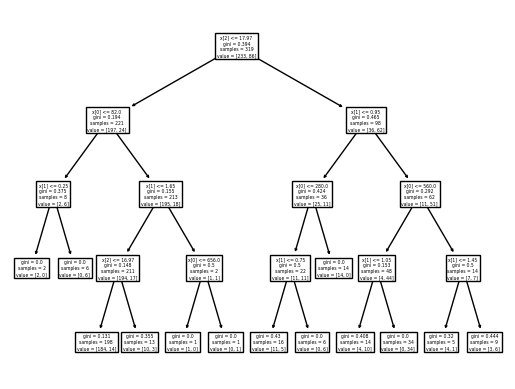

In [34]:
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y)
tree.plot_tree(clf2)

the decision tree splits the dataset into branches based on thresholds for the features (NumPages, Thick, and List Price).

Q6

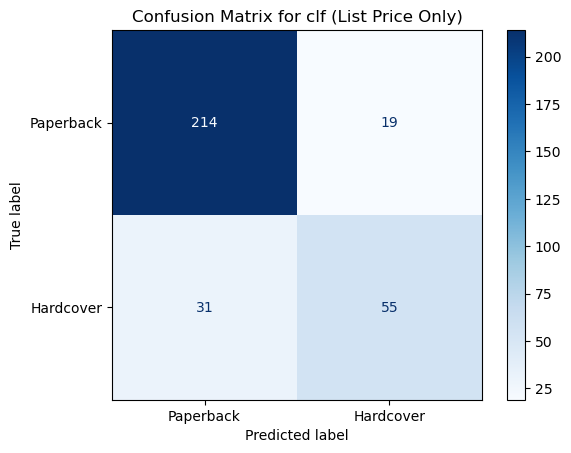

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for both models on the test data
y_pred_clf = clf.predict(X[['List Price']])  # clf only uses List Price


# Confusion matrix for clf
cm_clf = confusion_matrix(y, y_pred_clf, labels=[0, 1])
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf (List Price Only)")
plt.show()



In [36]:
from sklearn.metrics import confusion_matrix

y_pred_clf = clf.predict(X[['List Price']]) 

cm_clf = confusion_matrix(y, y_pred_clf, labels=[0, 1])
TP_clf, FN_clf, FP_clf, TN_clf = cm_clf.ravel()


# Calculate Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)


print("Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

Metrics for clf (List Price only):
Sensitivity: 0.9185
Specificity: 0.6395
Accuracy: 0.8433


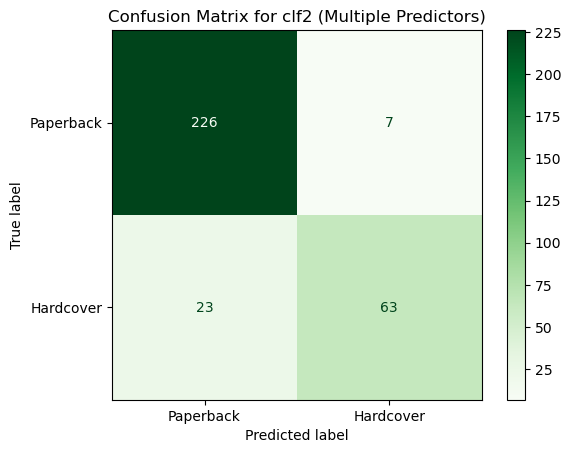

In [37]:
y_pred_clf2 = clf2.predict(X2[['NumPages', 'Thick', 'List Price']])  

cm_clf2 = confusion_matrix(y, y_pred_clf2, labels=[0, 1])
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Greens')
plt.title("Confusion Matrix for clf2 (Multiple Predictors)")
plt.show()


In [38]:
y_pred_clf2 = clf2.predict(X2[['NumPages', 'Thick', 'List Price']]) 

# Confusion matrix for clf2 (Multiple Predictors)
cm_clf2 = confusion_matrix(y, y_pred_clf2, labels=[0, 1])
TP_clf2, FN_clf2, FP_clf2, TN_clf2 = cm_clf2.ravel()

# Calculate Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

print("\nMetrics for clf2 (Multiple Predictors):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")



Metrics for clf2 (Multiple Predictors):
Sensitivity: 0.9700
Specificity: 0.7326
Accuracy: 0.9060


Q7

The difference is the predictions used, in the first matrix only used 'List Price', and the second used multiple predictions 'NumPages','Thick','List Price'. The confusion matrices for clf and clf2 (using multiple features for both models) are likely better because they leverage more relevant variables, reducing the chance of underfitting and improving model performance on the test set.

Q8

The most important feature is 'List Price' with an importance score of 0.494.


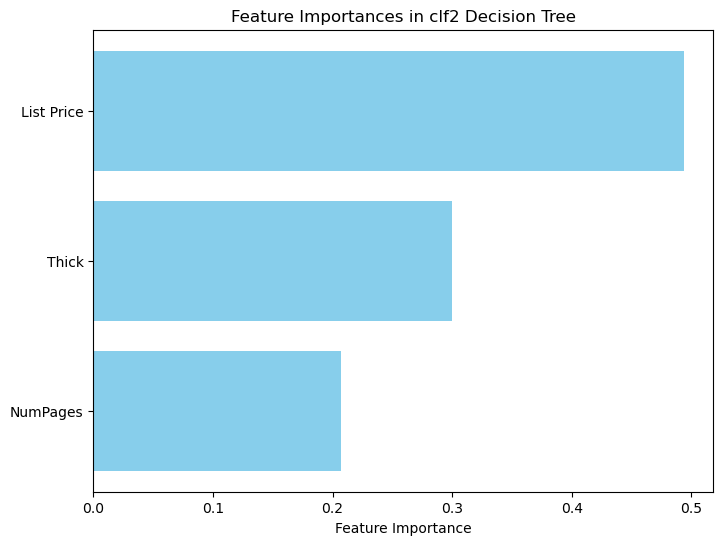

In [41]:
# Accessing feature importances and corresponding feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

import numpy as np

# Identify the most important feature
most_important_idx = np.argmax(importances)
most_important_feature = feature_names[most_important_idx]
most_important_value = importances[most_important_idx]

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_value:.3f}.")

import matplotlib.pyplot as plt

# Sort features and their importances for better visualization
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances in clf2 Decision Tree')
plt.show()



Q9

In linear regression, the coefficients tell you exactly how much the outcome changes when you increase a predictor by one unit, while keeping all other predictors constant.
In decision trees, feature importance shows how often and effectively a variable is used to split the data to make better predictions. However, it doesn't give a direct or linear relationship like in linear regression. 

Q10

yes